<a href="https://colab.research.google.com/github/MackenzieRip/DataSci/blob/main/Mackenzie_Ripley_Lab_9_Linear_Model_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

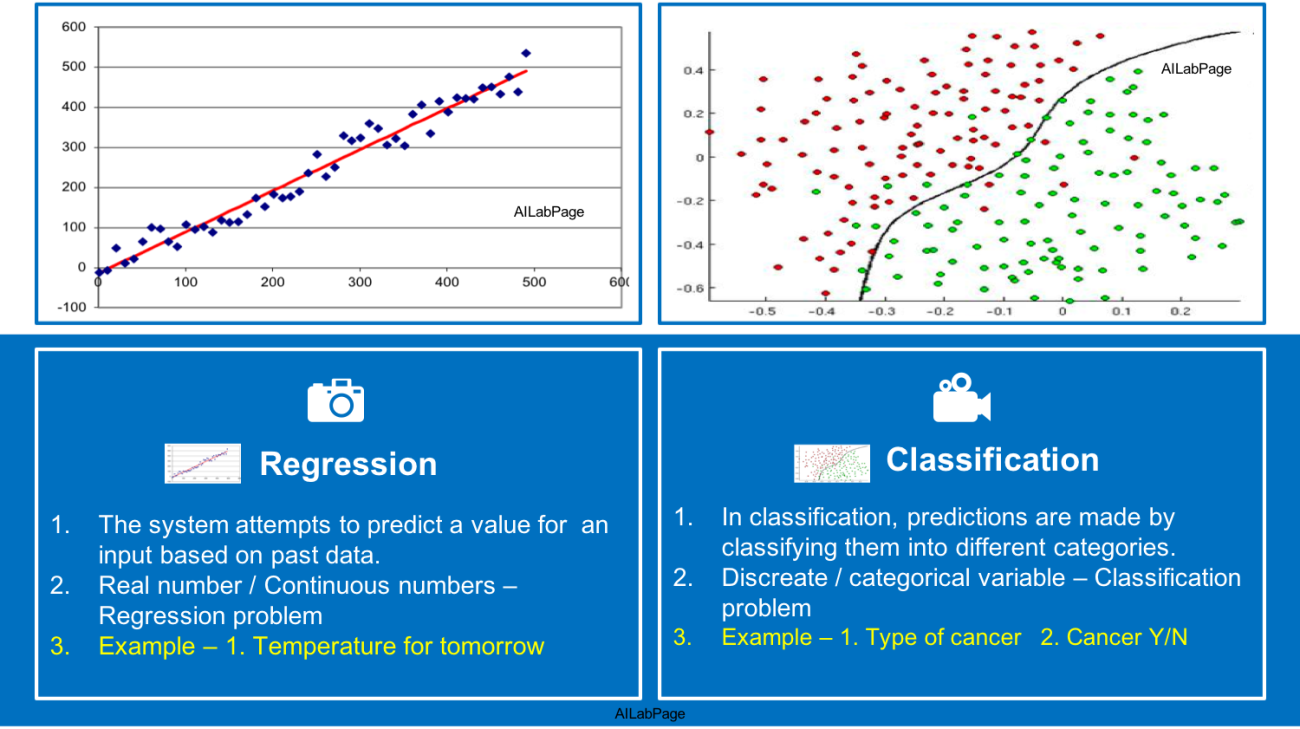

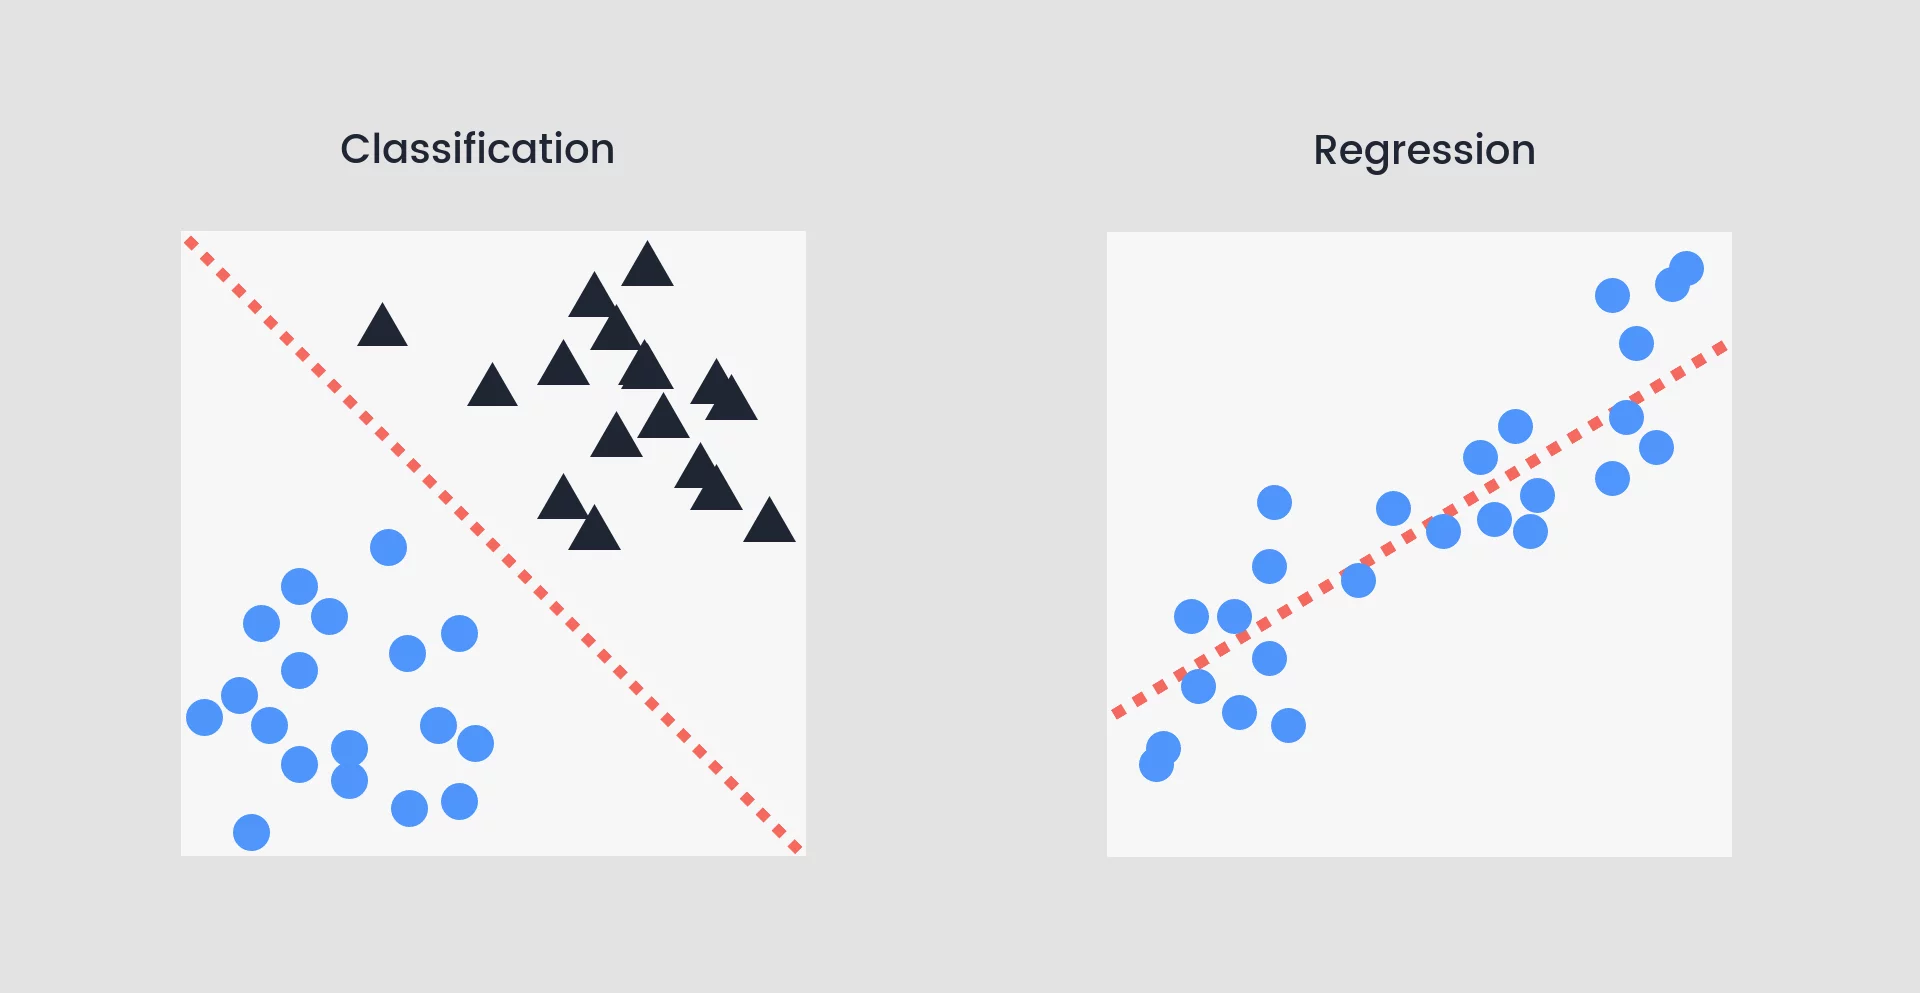

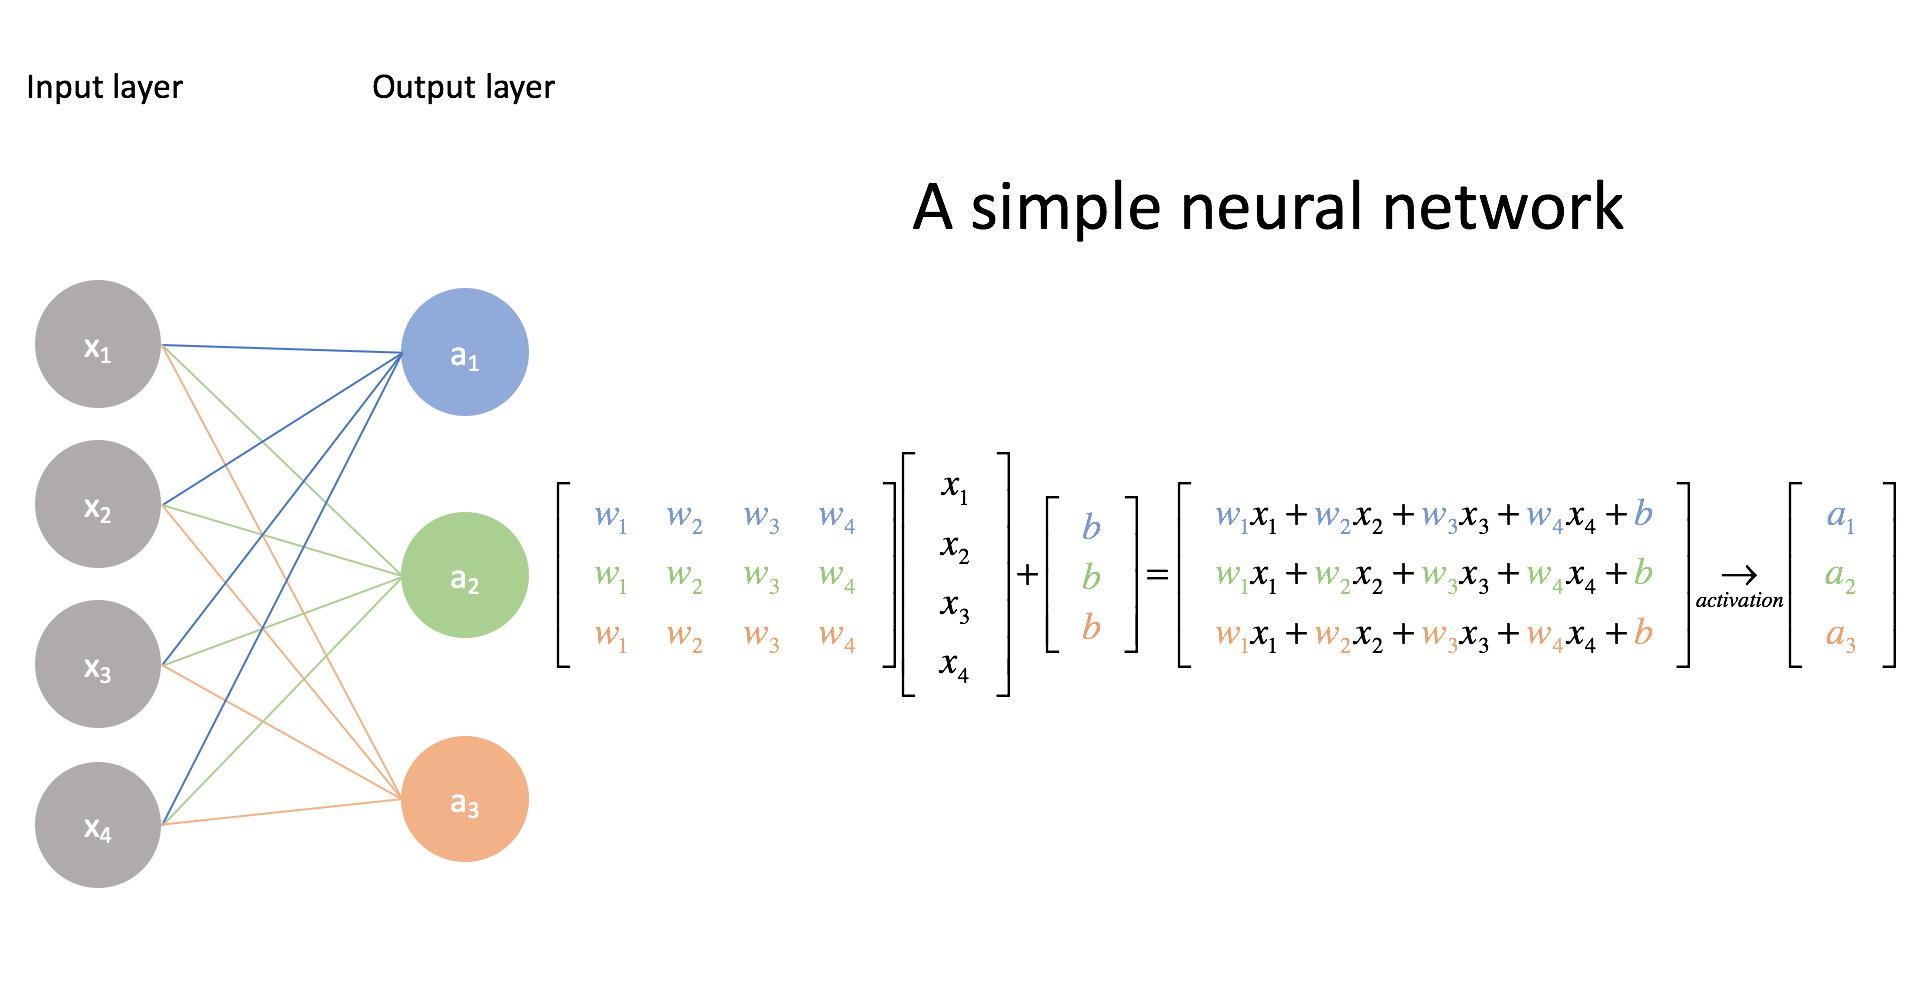

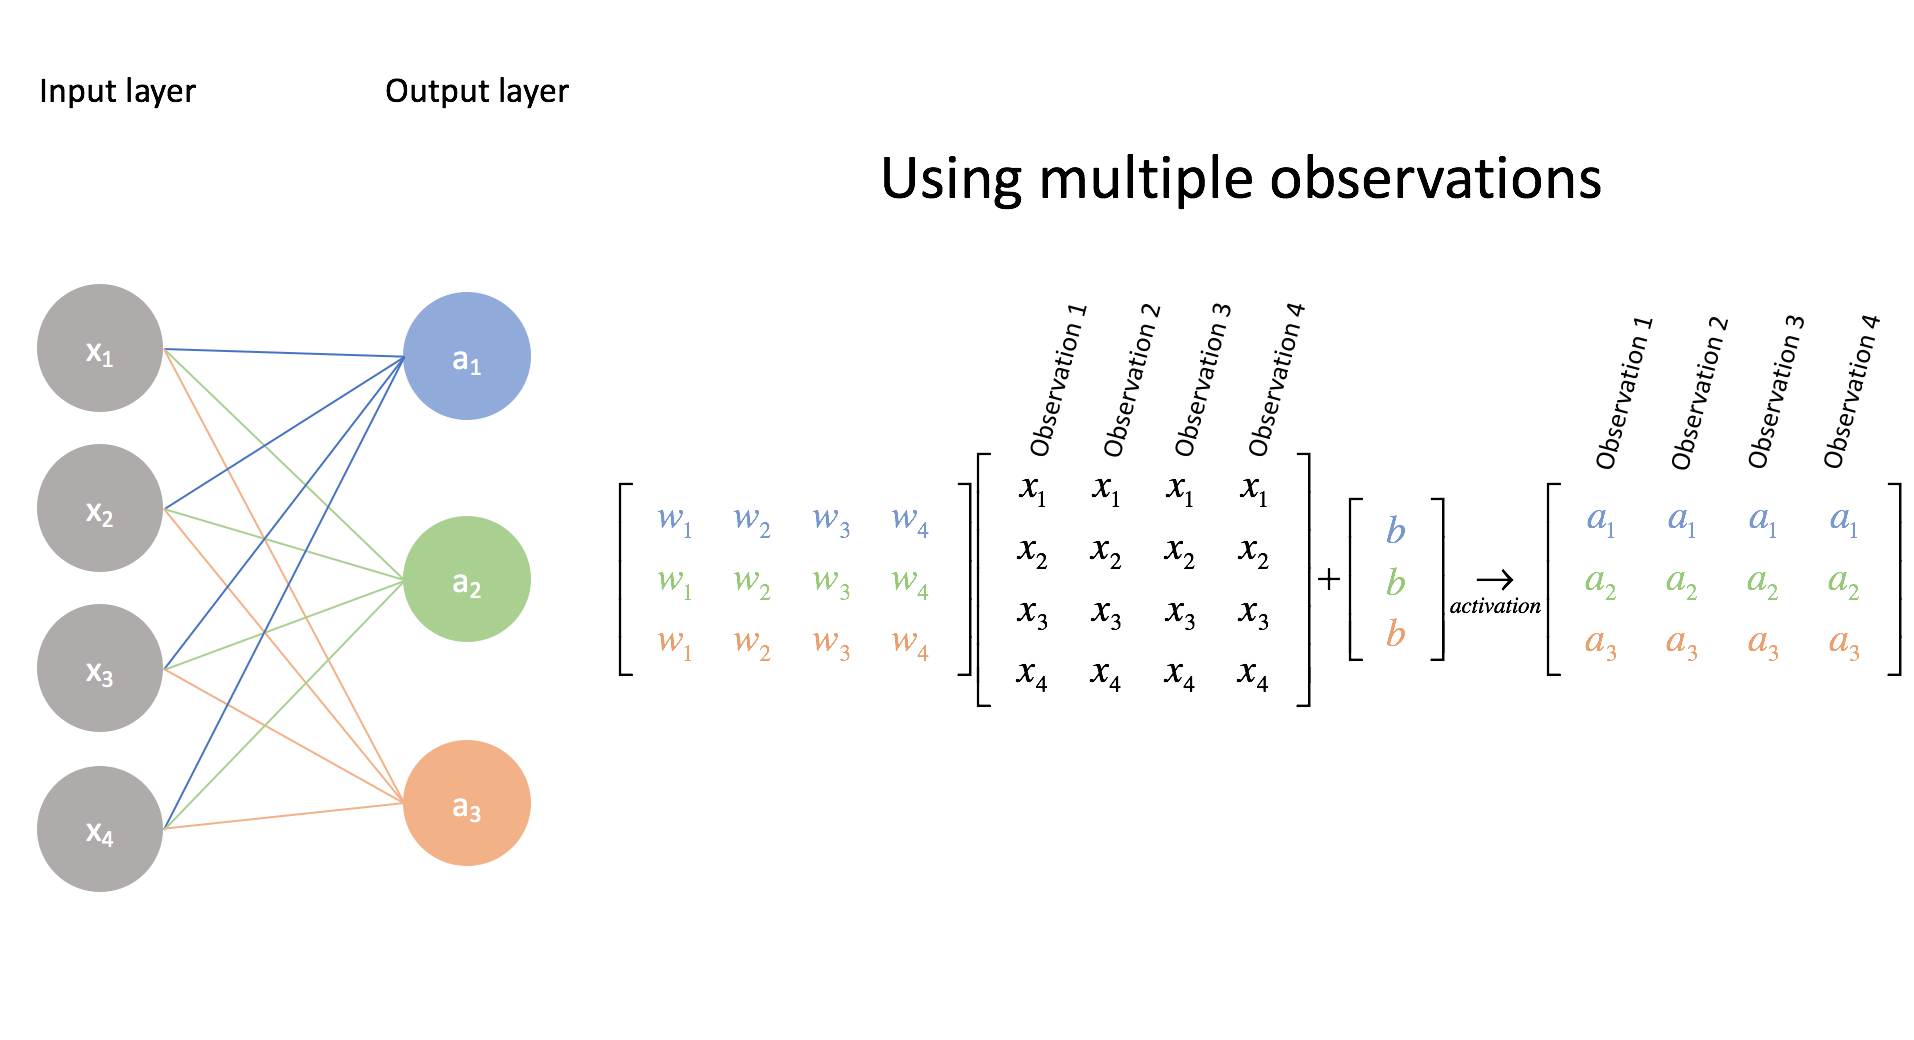

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr    #connecting class website to colab
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-r_16pyo9
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-r_16pyo9
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=8718d4c63a352d2c0cec22c471103081021ddc491fbbfc55ec9ec27e3e916d5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-30t77o2k/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d26fe2676eb2a434a144d1b26e23f7f4425b191ff7142d41640e9894d772f5f6
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [2]:
def plot(x):                              #defining plot
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [3]:
def montage_plot(x):                    #defining montage_plot
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [4]:
def one_hot(y):                        #defining one_hot
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [5]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [7]:
X.shape       #the X.shape

(60000, 1, 28, 28)

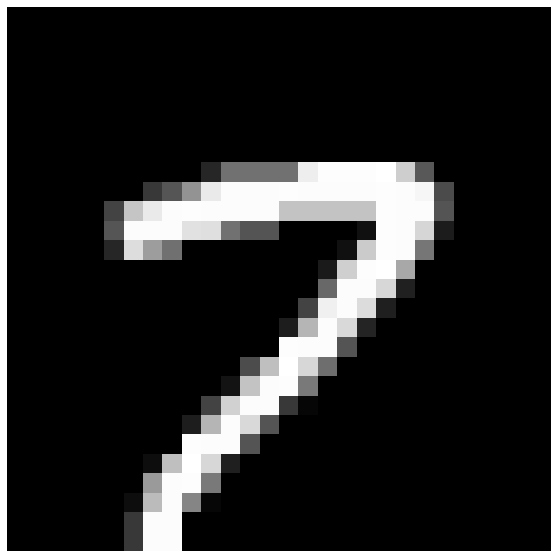

In [8]:
plot(X[123,0,0:28,0:28])  #plotting X[123,0,0:28,0:28]

In [9]:
Y[123] 

7

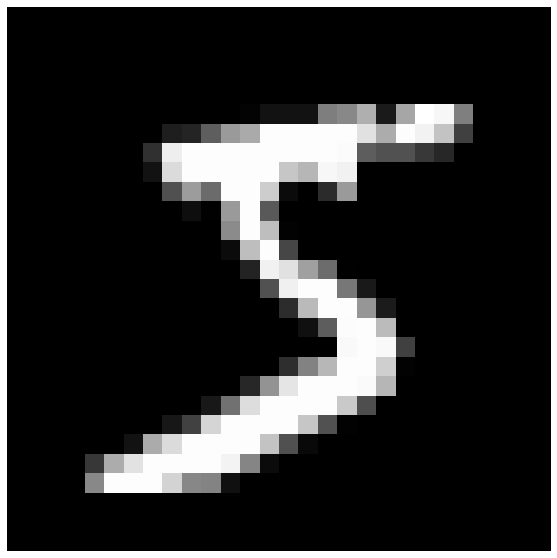

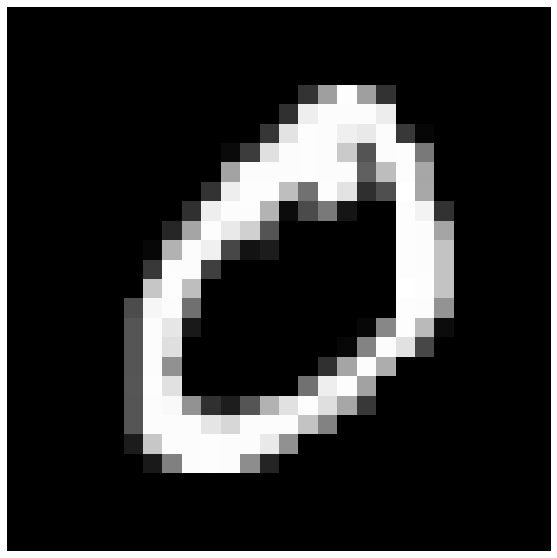

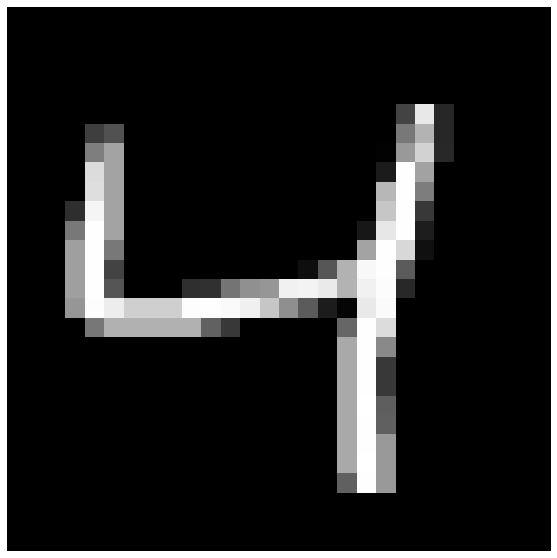

In [10]:
for i in range(3):
    plot(X[i,0,:,:])       #plotting X[i,0,:,:]

In [11]:
Y  #showing the array of Y

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
X[0:25,0,:,:].shape

(25, 28, 28)

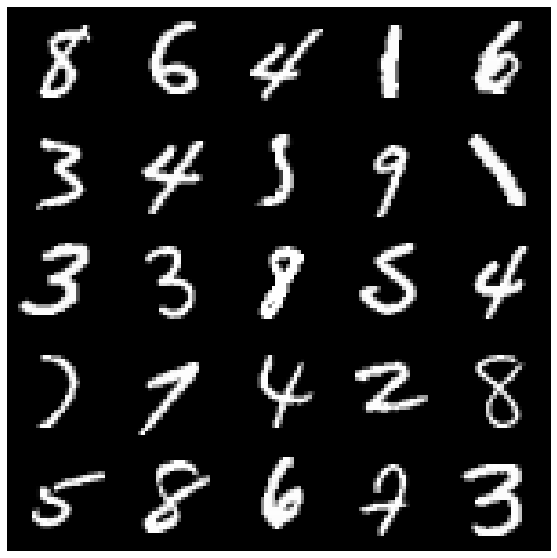

In [13]:
montage_plot(X[125:150,0,:,:]) #plotting X[125:150,0,:,:]

In [14]:
X.shape[0]

60000

In [15]:
X_test.shape

(10000, 1, 28, 28)

In [16]:
X.shape[0]

60000

In [17]:
X_test.shape[0]

10000

In [18]:
28*28  #multipying 28 by 28

784

In [19]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [20]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [21]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

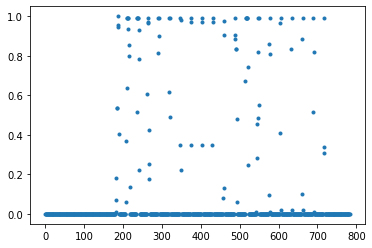

In [22]:
plt.plot(X[100],'.')  #plotting X[100] on a scatter plot

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

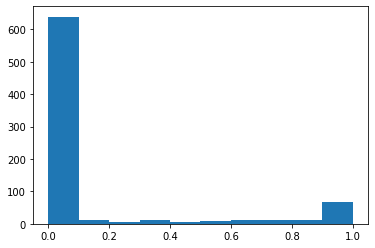

In [23]:
plt.hist(X[0])   #ploting X[0] on a histogram

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [25]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'   #defining url
wget.download(url,"W.data")

'W.data'

In [26]:
W = torch.load("W.data")            #defining W

In [27]:
W.shape

torch.Size([784, 10])

In [28]:
X.shape

torch.Size([60000, 784])

In [29]:
def plot(x):                         #defining plot
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

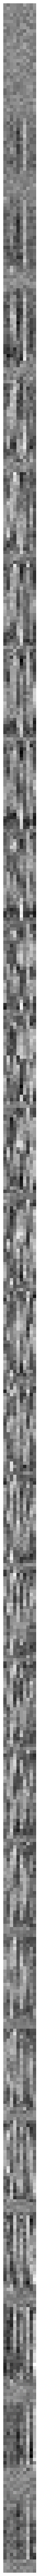

In [30]:
plot(W[0:784,:10])   #plotting W[0:784,:10]

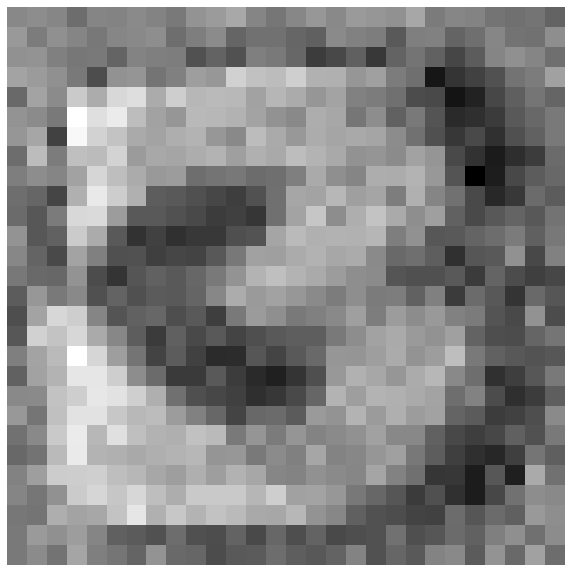

In [31]:
plot(W[:,3].reshape(28,28)) #plotting W[:,3].reshape(28,28)

In [32]:
X.shape

torch.Size([60000, 784])

In [33]:
b = 40   #defining b as 40

def get_batch(mode):               #defining get_batch
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [34]:
x,y = get_batch('train')

In [35]:
x.shape

torch.Size([40, 784])

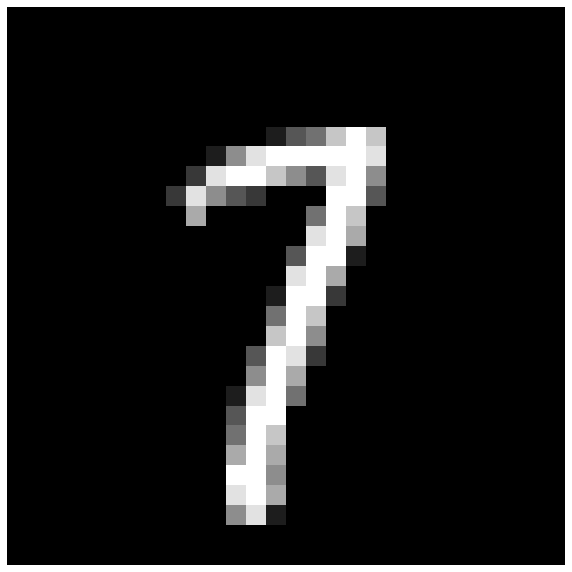

In [36]:
plot(x[0].reshape(28,28))   #plotting x[0].reshape(28,28)

In [37]:
y

tensor([7., 2., 3., 5., 6., 5., 3., 6., 3., 6., 2., 6., 8., 3., 3., 3., 6., 3.,
        0., 1., 4., 7., 4., 2., 5., 2., 1., 7., 8., 2., 0., 3., 1., 6., 5., 8.,
        6., 5., 4., 1.], device='cuda:0')

In [38]:
x.shape, W.shape

(torch.Size([40, 784]), torch.Size([784, 10]))

In [39]:
torch.matmul(x,W).shape

torch.Size([40, 10])

In [40]:
(x@W).shape

torch.Size([40, 10])

In [41]:
y = x@W

In [42]:
y.shape

torch.Size([40, 10])

In [43]:
y    #showing y

tensor([[-2.5871e+00,  3.1488e+00,  7.4584e-01,  1.2385e+00, -5.8323e+00,
         -3.4244e+00, -5.4000e+00,  4.5417e+00,  2.0318e+00,  3.0367e+00],
        [-5.9605e+00, -6.1342e+00,  1.5960e+01,  2.0262e+00, -1.6756e+01,
         -5.3395e+00, -1.9114e+00, -5.8337e+00,  3.7889e-01, -1.0477e+01],
        [ 2.6296e+00, -4.9752e+00, -4.6906e+00,  8.3093e+00, -3.7277e+00,
          6.5650e+00, -4.5375e+00, -2.9762e+00,  2.1576e+00,  1.0609e+00],
        [ 4.1048e+00, -1.0881e+01, -1.0057e+01, -3.2322e+00,  3.1436e-01,
          1.3103e+01, -4.8019e+00, -2.6323e+00,  2.3503e+00, -4.8674e+00],
        [-6.1889e+00, -2.1418e+01, -1.7542e+00, -8.3901e+00,  5.0925e+00,
          2.4421e+00,  1.1530e+01, -1.5402e+01, -1.1691e+00, -2.8632e+00],
        [ 1.2828e+00, -8.7561e+00, -7.0363e+00, -1.3933e+00, -1.3925e-01,
          9.8014e+00, -1.2706e+00, -4.1801e-01, -3.6288e+00, -5.4127e+00],
        [-2.4244e+00, -3.8834e+00, -2.8091e+00,  1.2738e+01, -2.6907e+00,
          2.9070e+00, -5.5704e+0

In [44]:
torch.argmax(y,1)

tensor([7, 2, 3, 5, 6, 5, 3, 6, 3, 6, 2, 6, 8, 3, 3, 3, 6, 3, 0, 1, 4, 7, 4, 2,
        6, 2, 1, 7, 8, 2, 0, 3, 1, 6, 3, 8, 6, 5, 4, 1], device='cuda:0')

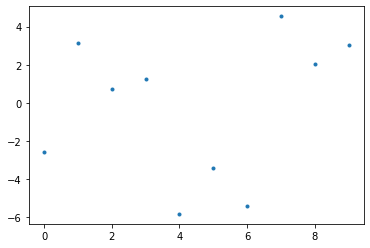

In [45]:
plt.plot(y[0].cpu().detach().numpy().T,'.')  #plotting y[0].cpu().detach().numpy().T on a scatter plot

https://eleif.net/clicktimer.html

In [46]:
x@W

tensor([[-2.5871e+00,  3.1488e+00,  7.4584e-01,  1.2385e+00, -5.8323e+00,
         -3.4244e+00, -5.4000e+00,  4.5417e+00,  2.0318e+00,  3.0367e+00],
        [-5.9605e+00, -6.1342e+00,  1.5960e+01,  2.0262e+00, -1.6756e+01,
         -5.3395e+00, -1.9114e+00, -5.8337e+00,  3.7889e-01, -1.0477e+01],
        [ 2.6296e+00, -4.9752e+00, -4.6906e+00,  8.3093e+00, -3.7277e+00,
          6.5650e+00, -4.5375e+00, -2.9762e+00,  2.1576e+00,  1.0609e+00],
        [ 4.1048e+00, -1.0881e+01, -1.0057e+01, -3.2322e+00,  3.1436e-01,
          1.3103e+01, -4.8019e+00, -2.6323e+00,  2.3503e+00, -4.8674e+00],
        [-6.1889e+00, -2.1418e+01, -1.7542e+00, -8.3901e+00,  5.0925e+00,
          2.4421e+00,  1.1530e+01, -1.5402e+01, -1.1691e+00, -2.8632e+00],
        [ 1.2828e+00, -8.7561e+00, -7.0363e+00, -1.3933e+00, -1.3925e-01,
          9.8014e+00, -1.2706e+00, -4.1801e-01, -3.6288e+00, -5.4127e+00],
        [-2.4244e+00, -3.8834e+00, -2.8091e+00,  1.2738e+01, -2.6907e+00,
          2.9070e+00, -5.5704e+0

In [47]:
y2 = x@W 

In [48]:
y2.shape

torch.Size([40, 10])

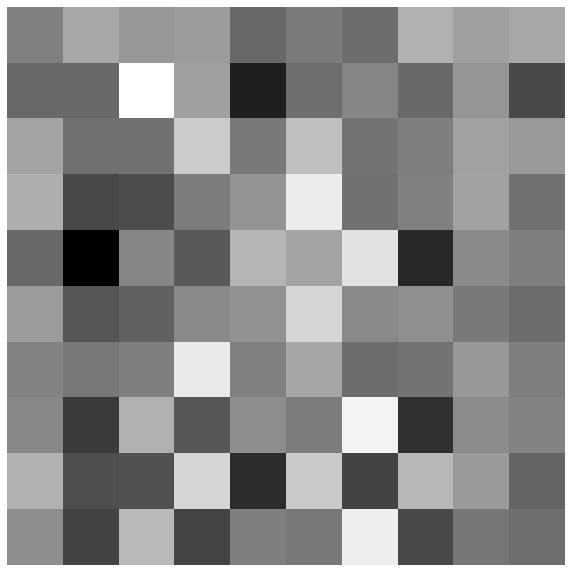

In [49]:
plot(y2[0:10,:])  #plotting y2[0:10,:]

In [50]:
y

tensor([[-2.5871e+00,  3.1488e+00,  7.4584e-01,  1.2385e+00, -5.8323e+00,
         -3.4244e+00, -5.4000e+00,  4.5417e+00,  2.0318e+00,  3.0367e+00],
        [-5.9605e+00, -6.1342e+00,  1.5960e+01,  2.0262e+00, -1.6756e+01,
         -5.3395e+00, -1.9114e+00, -5.8337e+00,  3.7889e-01, -1.0477e+01],
        [ 2.6296e+00, -4.9752e+00, -4.6906e+00,  8.3093e+00, -3.7277e+00,
          6.5650e+00, -4.5375e+00, -2.9762e+00,  2.1576e+00,  1.0609e+00],
        [ 4.1048e+00, -1.0881e+01, -1.0057e+01, -3.2322e+00,  3.1436e-01,
          1.3103e+01, -4.8019e+00, -2.6323e+00,  2.3503e+00, -4.8674e+00],
        [-6.1889e+00, -2.1418e+01, -1.7542e+00, -8.3901e+00,  5.0925e+00,
          2.4421e+00,  1.1530e+01, -1.5402e+01, -1.1691e+00, -2.8632e+00],
        [ 1.2828e+00, -8.7561e+00, -7.0363e+00, -1.3933e+00, -1.3925e-01,
          9.8014e+00, -1.2706e+00, -4.1801e-01, -3.6288e+00, -5.4127e+00],
        [-2.4244e+00, -3.8834e+00, -2.8091e+00,  1.2738e+01, -2.6907e+00,
          2.9070e+00, -5.5704e+0

In [53]:
one_hot(y)

ValueError: ignored

In [55]:
plot(one_hot(y))   #plotting one_hot(y)

ValueError: ignored

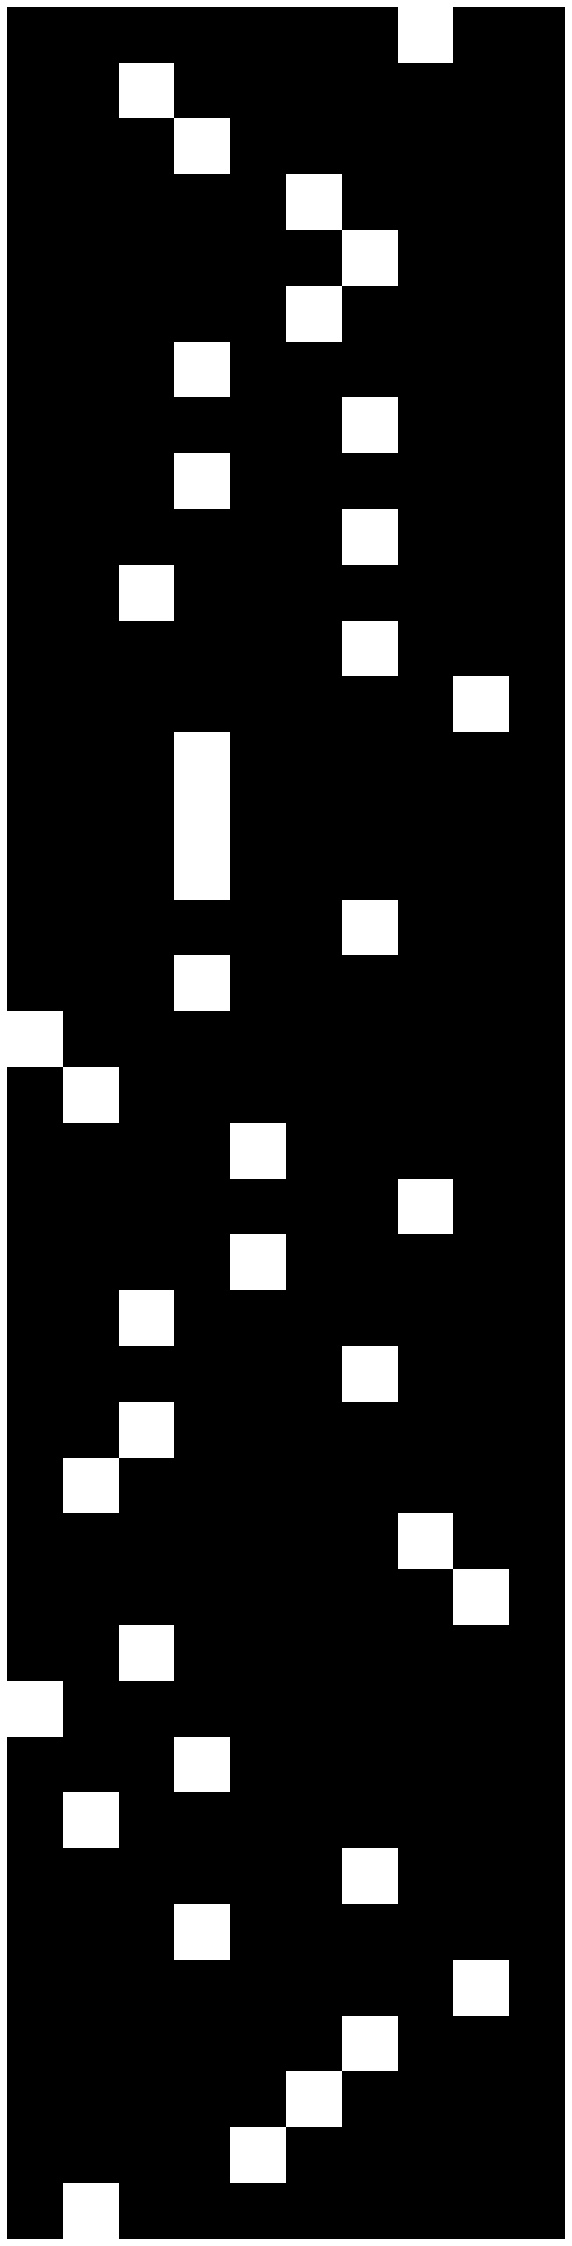

In [54]:
plot(one_hot(torch.argmax(y2,1)))               #plotting one_hot(torch.argmax(y2,1))

In [56]:
y

tensor([[-2.5871e+00,  3.1488e+00,  7.4584e-01,  1.2385e+00, -5.8323e+00,
         -3.4244e+00, -5.4000e+00,  4.5417e+00,  2.0318e+00,  3.0367e+00],
        [-5.9605e+00, -6.1342e+00,  1.5960e+01,  2.0262e+00, -1.6756e+01,
         -5.3395e+00, -1.9114e+00, -5.8337e+00,  3.7889e-01, -1.0477e+01],
        [ 2.6296e+00, -4.9752e+00, -4.6906e+00,  8.3093e+00, -3.7277e+00,
          6.5650e+00, -4.5375e+00, -2.9762e+00,  2.1576e+00,  1.0609e+00],
        [ 4.1048e+00, -1.0881e+01, -1.0057e+01, -3.2322e+00,  3.1436e-01,
          1.3103e+01, -4.8019e+00, -2.6323e+00,  2.3503e+00, -4.8674e+00],
        [-6.1889e+00, -2.1418e+01, -1.7542e+00, -8.3901e+00,  5.0925e+00,
          2.4421e+00,  1.1530e+01, -1.5402e+01, -1.1691e+00, -2.8632e+00],
        [ 1.2828e+00, -8.7561e+00, -7.0363e+00, -1.3933e+00, -1.3925e-01,
          9.8014e+00, -1.2706e+00, -4.1801e-01, -3.6288e+00, -5.4127e+00],
        [-2.4244e+00, -3.8834e+00, -2.8091e+00,  1.2738e+01, -2.6907e+00,
          2.9070e+00, -5.5704e+0

In [57]:
torch.argmax(y2,1)

tensor([7, 2, 3, 5, 6, 5, 3, 6, 3, 6, 2, 6, 8, 3, 3, 3, 6, 3, 0, 1, 4, 7, 4, 2,
        6, 2, 1, 7, 8, 2, 0, 3, 1, 6, 3, 8, 6, 5, 4, 1], device='cuda:0')

In [58]:
b    #showing b = 40

40

In [59]:
torch.sum(y == torch.argmax(y2,1))/b

RuntimeError: ignored

In [60]:
X.shape

torch.Size([60000, 784])

In [61]:
%%timeit
X[20000]@W

27.6 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [62]:
torch.argmax(X@W,1)

tensor([5, 0, 4,  ..., 5, 6, 8], device='cuda:0')

In [63]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [64]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.9122, device='cuda:0')

In [65]:
X@W

tensor([[  1.1735,  -5.3252,  -2.2280,  ...,   2.8160,  -2.5256,  -4.7146],
        [ 14.1848, -13.8266,  -2.0614,  ...,  -2.7536,  -0.4526,  -5.3169],
        [ -3.9527,  -9.5646,  -3.1270,  ...,  -0.5796,  -2.7272,   0.5264],
        ...,
        [  1.7139,  -3.4259, -10.8608,  ...,  -0.3874,   5.0143,   0.4739],
        [  3.0898, -10.5911,  -2.0102,  ...,  -4.0874,  -7.1931,  -2.6339],
        [  2.8741,  -6.6511,  -1.8780,  ...,  -3.2709,   7.5771,   1.3491]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [66]:
W.shape

torch.Size([784, 10])

In [67]:
W[:,0].shape

torch.Size([784])

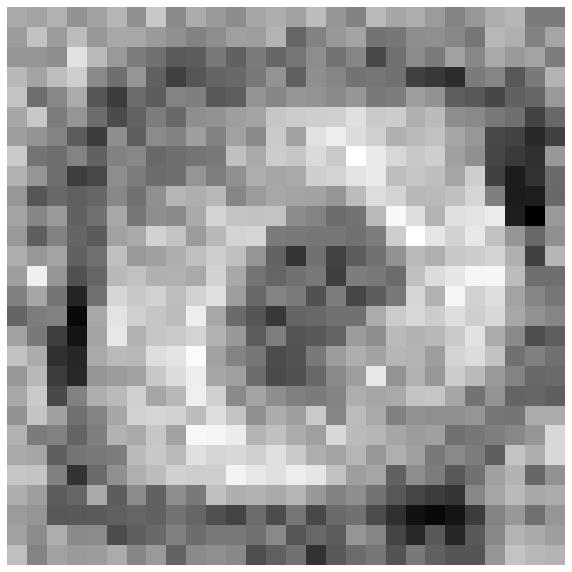

In [68]:
plot(W[:,0].reshape(28,28))   #plotting W[:,0].reshape(28,28)

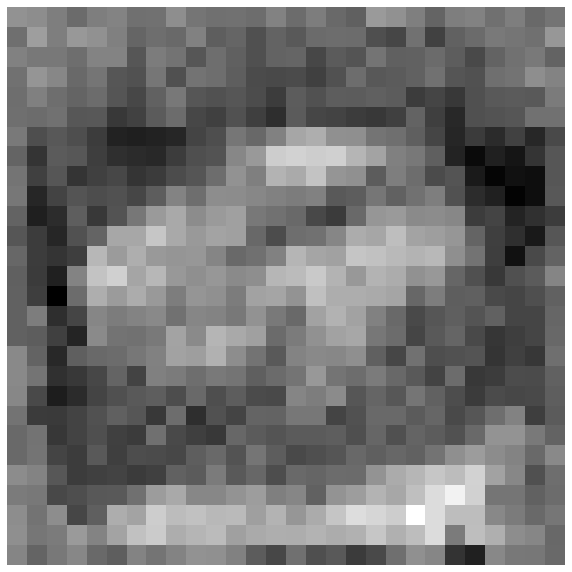

In [69]:
plot(W[:,9].reshape(28,28))  #plotting W[:,9].reshape(28,28)

In [70]:
W.shape

torch.Size([784, 10])

In [71]:
(W.T).shape

torch.Size([10, 784])

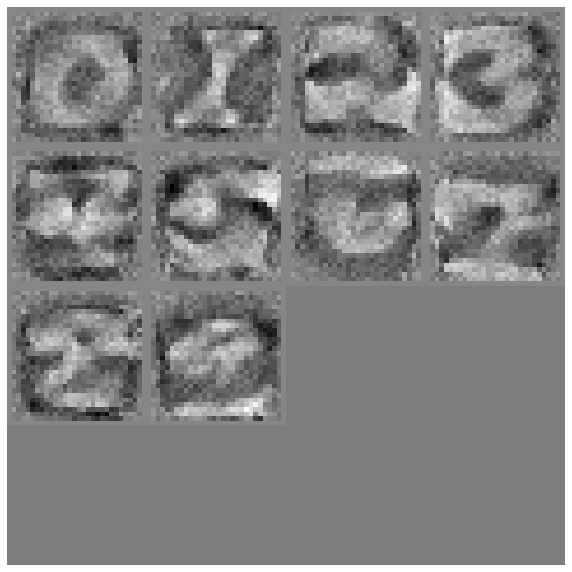

In [72]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [73]:
###################################################

In [74]:
def softmax(x):                                      #defining softmax
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [75]:
def cross_entropy(outputs, labels):                 #defining cross_entropy
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [76]:
def Truncated_Normal(size):                         #defining Truncated_Normal

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [77]:
def acc(out,y):                                     #defining acc
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [78]:
X.shape

torch.Size([60000, 784])

In [79]:
def get_batch(mode):                         #defining get_batch
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [80]:
def model(x,w):                             #defining model

    return x@w[0]

In [81]:
def make_plots():                           #defining make_plots
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [82]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


#Generator

In [83]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [84]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

In [85]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [86]:
batch_size = 512

In [87]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [88]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [89]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [90]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [91]:
###################################################

In [92]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [93]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [94]:
X = (X + 1)/2
X_test = (X_test + 1)/2

In [95]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [96]:
x,y = get_batch('train')

(array([509.,  32.,  25.,  17.,  24.,  26.,  40.,  59.,  42.,  10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

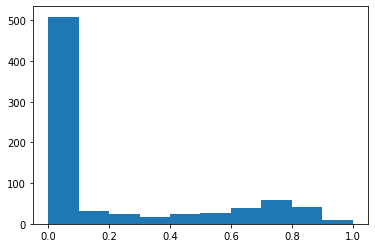

In [133]:
plt.hist(x.flatten().cpu().numpy()) #plotting x.flatten().cpu().numpy() on a histogram

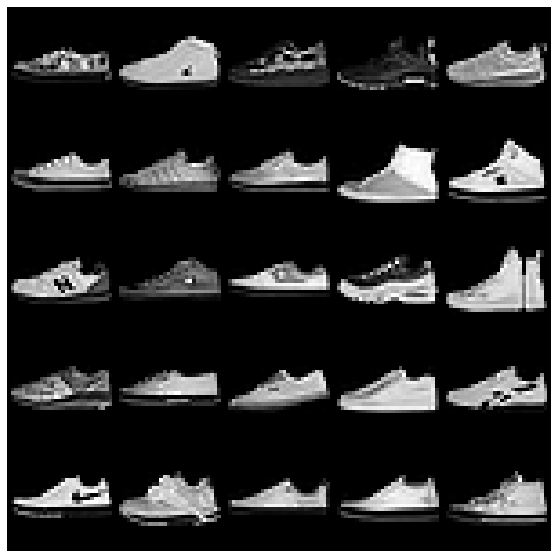

In [98]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())   #plotting x[0:25,0,:,:].detach().cpu().numpy()

In [99]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [100]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [101]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)

In [102]:
def Encoder(x,w):
    return x@w[0]

In [103]:
def Decoder(x,w):
    return x@(w[0].T)

In [104]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [105]:
batch_size = 512
steps = 10000
learning_rate = 4e-3

In [106]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.407262921333313
0.0043072085827589035
0.003589079948142171
0.003254252951592207
0.0031113678123801947
0.0031083852518349886
0.003489874070510268
0.0033271287102252245
0.0033351979218423367
0.003470929805189371


In [107]:
# batch_size = 16

In [108]:
x,y = get_batch('test')

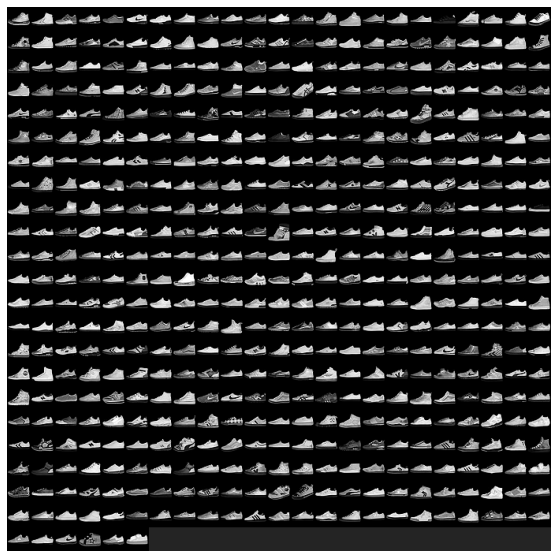

In [109]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())    #plotting x.reshape(-1,28,28).detach().cpu().numpy()

In [110]:
x.shape

torch.Size([512, 784])

In [111]:
Decoder(Encoder(x,w),w).shape

torch.Size([512, 784])

In [112]:
x2 = Autoencoder(x,w)

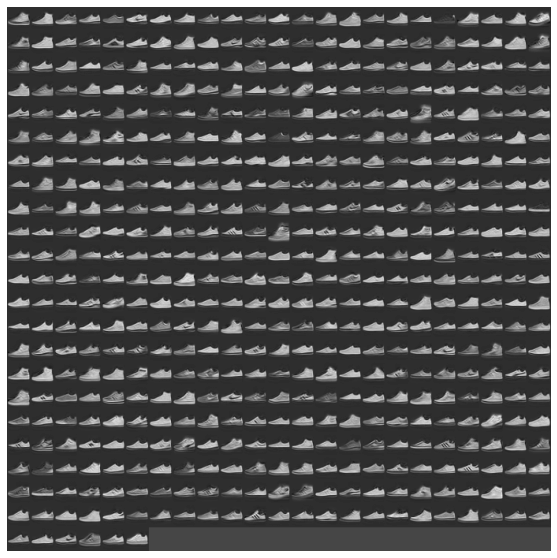

In [113]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())    #plotting x2.reshape(-1,28,28).detach().cpu().numpy()

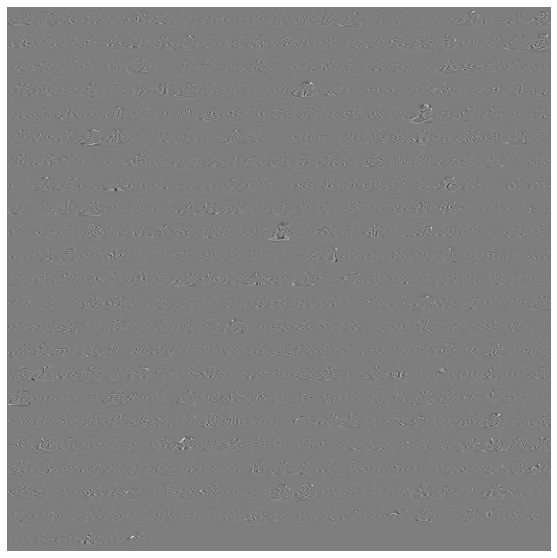

In [114]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())     #plotting (x-x2).reshape(-1,28,28).detach().cpu().numpy()

In [115]:
w[0].shape

torch.Size([784, 78])

In [116]:
wp = w[0].T 

In [117]:
wp = wp.reshape(-1,28,28)

In [118]:
wp.shape

torch.Size([78, 28, 28])

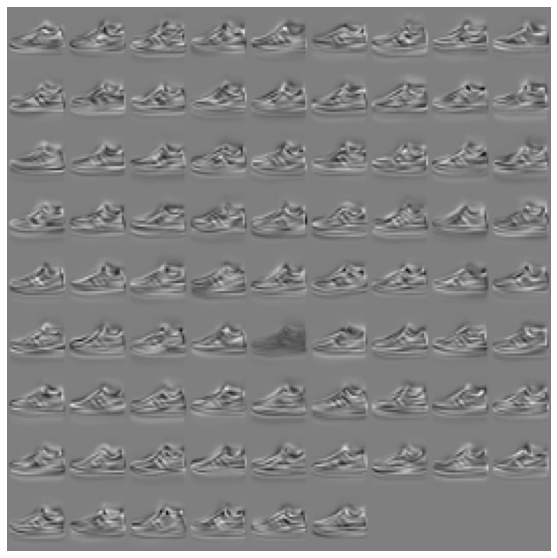

In [119]:
montage_plot(wp.detach().cpu().numpy())    #plotting wp.detach().cpu().numpy()

In [120]:
x.shape

torch.Size([512, 784])

In [121]:
x = x[0:1]       #defining x

In [122]:
y = Encoder(x,w)   #defining y

In [123]:
y.shape

torch.Size([1, 78])

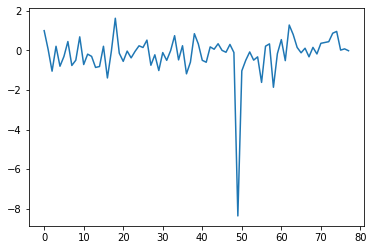

In [124]:
plt.plot(y[0].cpu().detach().numpy())     #plotting y[0].cpu().detach().numpy()

In [125]:
noise = 0.5*np.random.randn(78)      #defining noise

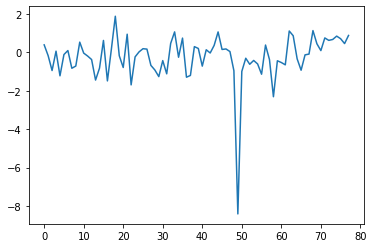

In [126]:
plt.plot(y[0].cpu().detach().numpy() + noise)    #plotting y[0].cpu().detach().numpy() + noise

In [127]:
noise   #showing the array of noise

array([-0.60090408, -0.21612832,  0.10876607, -0.13965305, -0.41648672,
        0.19928451, -0.34673818, -0.06044384, -0.21231328, -0.14602974,
        0.68179457,  0.00237527, -0.06605964, -0.57655047, -0.00201121,
        0.41894491, -0.08977507,  0.20644142,  0.26333652, -0.02953748,
       -0.22883814,  0.98752313, -1.31078495, -0.18330885, -0.20262965,
        0.04946202, -0.34470061,  0.0782156 , -0.6899316 , -0.24080045,
       -0.31433533, -0.6111148 ,  0.47899159,  0.32914216,  0.23089128,
        0.51397384, -0.10503739, -0.6037068 , -0.54045943, -0.1161203 ,
       -0.21035947,  0.74023985, -0.20352998,  0.30925265,  0.73485079,
        0.15634975,  0.27748276, -0.25354292, -0.84606432, -0.04941875,
        0.04651933,  0.19742555, -0.53734251,  0.07586343, -0.27286971,
        0.4848302 ,  0.1749029 , -0.70029555, -0.44317006, -0.26770976,
       -1.06835602, -0.12743688, -0.16356662,  0.07120048, -0.48156774,
       -0.80408295, -0.2347698 ,  0.24001225,  0.98860208,  0.63

In [128]:
noise = GPU(noise)   #defining noise

In [129]:
x2 = Decoder(y+noise,w)  #defining x2

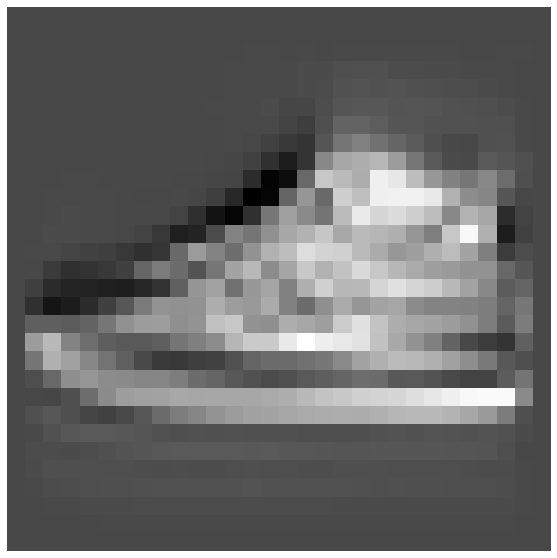

In [130]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())   #plotting x2.reshape(-1,28,28).detach().cpu().numpy()

In [131]:
x2 = Decoder(y,w)      #defining x2

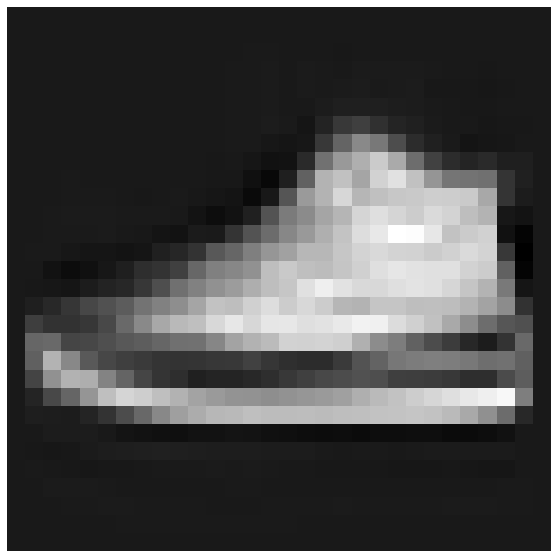

In [132]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())   #plotting x2.reshape(-1,28,28).detach().cpu().numpy()